In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras import models
from keras.layers import Dense

In [9]:
data = pd.read_csv('Train_Data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   MSZoning       1100 non-null   object 
 3   LotFrontage    908 non-null    float64
 4   LotArea        1100 non-null   int64  
 5   Street         1100 non-null   object 
 6   Alley          69 non-null     object 
 7   LotShape       1100 non-null   object 
 8   LandContour    1100 non-null   object 
 9   Utilities      1100 non-null   object 
 10  LotConfig      1100 non-null   object 
 11  LandSlope      1100 non-null   object 
 12  Neighborhood   1100 non-null   object 
 13  Condition1     1100 non-null   object 
 14  Condition2     1100 non-null   object 
 15  BldgType       1100 non-null   object 
 16  HouseStyle     1100 non-null   object 
 17  OverallQual    1100 non-null   int64  
 18  OverallC

In [11]:
data = data.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1)

In [12]:
data.shape[0]

1100

In [13]:
columns = data.columns
data_types = data.dtypes
col_counts = data.count()

N = data.shape[0]

obj_cols = []
missing_obj_cols = []
missing_num_cols = []

for i in range(data.shape[1]):  
    if data_types[i]=='object' and col_counts[i]!=N:
        missing_obj_cols.append(columns[i])
        
for i in range(data.shape[1]):        
    if data_types[i]=='object':
        obj_cols.append(columns[i])
        
print(obj_cols)
print(missing_obj_cols)

 
for j in range(data.shape[1]):
    if (data_types[j]=='int64' or data_types[j]=='float64') and col_counts[j]!=N:
        missing_num_cols.append(columns[j])
        
print(missing_num_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


# Filling missing values

In [14]:
for i in missing_obj_cols:
    data[i].fillna('NAN',inplace=True)
    
    

for j in missing_num_cols:
    data[j].fillna(data[j].mean(),inplace=True)

# Converting the data in numerical form

In [15]:
le = LabelEncoder()
cv = CountVectorizer()

    
for i in obj_cols:
    data[i] = le.fit_transform(data[i])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1100 non-null   int64  
 1   MSZoning       1100 non-null   int32  
 2   LotFrontage    1100 non-null   float64
 3   LotArea        1100 non-null   int64  
 4   Street         1100 non-null   int32  
 5   LotShape       1100 non-null   int32  
 6   LandContour    1100 non-null   int32  
 7   Utilities      1100 non-null   int32  
 8   LotConfig      1100 non-null   int32  
 9   LandSlope      1100 non-null   int32  
 10  Neighborhood   1100 non-null   int32  
 11  Condition1     1100 non-null   int32  
 12  Condition2     1100 non-null   int32  
 13  BldgType       1100 non-null   int32  
 14  HouseStyle     1100 non-null   int32  
 15  OverallQual    1100 non-null   int64  
 16  OverallCond    1100 non-null   int64  
 17  YearBuilt      1100 non-null   int64  
 18  YearRemo

In [16]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,4,0,12,2008,8,4,250000


Creating X and Y data

In [17]:
X = data.drop('SalePrice',axis=1)
Y = data['SalePrice']

X_train = X.values
Y_train = Y.values

print(X_train.shape)
print(Y_train.shape)

(1100, 76)
(1100,)


Normalising our data

In [20]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

# Creating our model

In [21]:
model = models.Sequential()

n = X_train.shape

model.add(Dense(20,activation = 'relu',input_shape = (X_train.shape[1],))) 
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1))
               

In [22]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae','acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1540      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
______________________________________________________

# Fitting the data in the model

In [360]:
x_val = X_train[:400]    #Splitting our data into training and validation
y_val = Y[:400]


x_train = X_train[400:]
y_train = Y[400:]

hist = model.fit(x_train,y_train,epochs=500,batch_size=32,validation_data = (x_val,y_val))

Epoch 1/500
22/22 [==============================] - 0s 16ms/step - loss: 39018409984.0000 - mae: 180127.2188 - acc: 0.0000e+00 - val_loss: 39463469056.0000 - val_mae: 183220.7188 - val_acc: 0.0000e+00
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 39017762816.0000 - mae: 180125.7500 - acc: 0.0000e+00 - val_loss: 39462604800.0000 - val_mae: 183218.6875 - val_acc: 0.0000e+00
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 39016607744.0000 - mae: 180123.1562 - acc: 0.0000e+00 - val_loss: 39461007360.0000 - val_mae: 183215.0156 - val_acc: 0.0000e+00
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 39014486016.0000 - mae: 180118.3125 - acc: 0.0000e+00 - val_loss: 39458025472.0000 - val_mae: 183208.2656 - val_acc: 0.0000e+00
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 39010430976.0000 - mae: 180109.4688 - acc: 0.0000e+00 - val_loss: 39452499968.0000 - val_mae: 183196.0938 - val_acc: 0.000

Epoch 42/500
22/22 [==============================] - 0s 3ms/step - loss: 4570274816.0000 - mae: 52832.3047 - acc: 0.0000e+00 - val_loss: 5064754176.0000 - val_mae: 54109.1133 - val_acc: 0.0000e+00
Epoch 43/500
22/22 [==============================] - 0s 4ms/step - loss: 4402677248.0000 - mae: 51589.5430 - acc: 0.0000e+00 - val_loss: 4876767232.0000 - val_mae: 52894.6289 - val_acc: 0.0000e+00
Epoch 44/500
22/22 [==============================] - 0s 3ms/step - loss: 4222495744.0000 - mae: 50415.8242 - acc: 0.0000e+00 - val_loss: 4729586176.0000 - val_mae: 52014.6445 - val_acc: 0.0000e+00
Epoch 45/500
22/22 [==============================] - 0s 4ms/step - loss: 4083856640.0000 - mae: 49374.0469 - acc: 0.0000e+00 - val_loss: 4572786688.0000 - val_mae: 50981.4805 - val_acc: 0.0000e+00
Epoch 46/500
22/22 [==============================] - 0s 3ms/step - loss: 3923663872.0000 - mae: 48317.5195 - acc: 0.0000e+00 - val_loss: 4420367360.0000 - val_mae: 49981.8398 - val_acc: 0.0000e+00
Epoch 47/5

22/22 [==============================] - 0s 3ms/step - loss: 1205817088.0000 - mae: 22732.2578 - acc: 0.0000e+00 - val_loss: 1541768192.0000 - val_mae: 27437.9219 - val_acc: 0.0000e+00
Epoch 125/500
22/22 [==============================] - 0s 3ms/step - loss: 1195939328.0000 - mae: 22740.9023 - acc: 0.0000e+00 - val_loss: 1530676224.0000 - val_mae: 27202.6426 - val_acc: 0.0000e+00
Epoch 126/500
22/22 [==============================] - 0s 3ms/step - loss: 1183593728.0000 - mae: 22573.2715 - acc: 0.0000e+00 - val_loss: 1519980928.0000 - val_mae: 27176.9531 - val_acc: 0.0000e+00
Epoch 127/500
22/22 [==============================] - 0s 3ms/step - loss: 1175363456.0000 - mae: 22452.0898 - acc: 0.0000e+00 - val_loss: 1511635456.0000 - val_mae: 27067.9434 - val_acc: 0.0000e+00
Epoch 128/500
22/22 [==============================] - 0s 3ms/step - loss: 1173127424.0000 - mae: 22363.7070 - acc: 0.0000e+00 - val_loss: 1506861440.0000 - val_mae: 27091.8691 - val_acc: 0.0000e+00
Epoch 129/500
22/22

22/22 [==============================] - 0s 3ms/step - loss: 748952000.0000 - mae: 17437.3613 - acc: 0.0000e+00 - val_loss: 1087526528.0000 - val_mae: 23149.6309 - val_acc: 0.0000e+00
Epoch 207/500
22/22 [==============================] - 0s 3ms/step - loss: 744866304.0000 - mae: 17456.2637 - acc: 0.0000e+00 - val_loss: 1087409152.0000 - val_mae: 23206.1191 - val_acc: 0.0000e+00
Epoch 208/500
22/22 [==============================] - 0s 3ms/step - loss: 743905472.0000 - mae: 17477.0410 - acc: 0.0000e+00 - val_loss: 1082828288.0000 - val_mae: 23129.7832 - val_acc: 0.0000e+00
Epoch 209/500
22/22 [==============================] - 0s 3ms/step - loss: 737106560.0000 - mae: 17344.0391 - acc: 0.0000e+00 - val_loss: 1083859456.0000 - val_mae: 23177.9199 - val_acc: 0.0000e+00
Epoch 210/500
22/22 [==============================] - 0s 3ms/step - loss: 732107456.0000 - mae: 17321.9668 - acc: 0.0000e+00 - val_loss: 1083502720.0000 - val_mae: 23211.1348 - val_acc: 0.0000e+00
Epoch 211/500
22/22 [===

Epoch 289/500
22/22 [==============================] - 0s 3ms/step - loss: 551201408.0000 - mae: 14992.7744 - acc: 0.0000e+00 - val_loss: 963812096.0000 - val_mae: 21989.2305 - val_acc: 0.0000e+00
Epoch 290/500
22/22 [==============================] - 0s 3ms/step - loss: 544227072.0000 - mae: 14855.2285 - acc: 0.0000e+00 - val_loss: 965981056.0000 - val_mae: 22020.9199 - val_acc: 0.0000e+00
Epoch 291/500
22/22 [==============================] - 0s 3ms/step - loss: 541136512.0000 - mae: 14906.1240 - acc: 0.0000e+00 - val_loss: 944150144.0000 - val_mae: 21677.6992 - val_acc: 0.0000e+00
Epoch 292/500
22/22 [==============================] - 0s 3ms/step - loss: 540707328.0000 - mae: 14799.8047 - acc: 0.0000e+00 - val_loss: 964449216.0000 - val_mae: 22017.9746 - val_acc: 0.0000e+00
Epoch 293/500
22/22 [==============================] - 0s 3ms/step - loss: 542251072.0000 - mae: 14822.8975 - acc: 0.0000e+00 - val_loss: 960218944.0000 - val_mae: 21951.1758 - val_acc: 0.0000e+00
Epoch 294/500
2

Epoch 372/500
22/22 [==============================] - 0s 3ms/step - loss: 436581824.0000 - mae: 13435.3125 - acc: 0.0000e+00 - val_loss: 927401664.0000 - val_mae: 21415.3574 - val_acc: 0.0000e+00
Epoch 373/500
22/22 [==============================] - 0s 3ms/step - loss: 432065184.0000 - mae: 13351.4805 - acc: 0.0000e+00 - val_loss: 931225600.0000 - val_mae: 21461.2676 - val_acc: 0.0000e+00
Epoch 374/500
22/22 [==============================] - 0s 3ms/step - loss: 433996512.0000 - mae: 13353.5488 - acc: 0.0000e+00 - val_loss: 926854656.0000 - val_mae: 21417.1621 - val_acc: 0.0000e+00
Epoch 375/500
22/22 [==============================] - 0s 3ms/step - loss: 426288224.0000 - mae: 13338.8984 - acc: 0.0000e+00 - val_loss: 927313856.0000 - val_mae: 21436.5020 - val_acc: 0.0000e+00
Epoch 376/500
22/22 [==============================] - 0s 3ms/step - loss: 429256544.0000 - mae: 13377.0195 - acc: 0.0000e+00 - val_loss: 924945024.0000 - val_mae: 21372.2930 - val_acc: 0.0000e+00
Epoch 377/500
2

Epoch 455/500
22/22 [==============================] - 0s 3ms/step - loss: 358853088.0000 - mae: 12213.0781 - acc: 0.0000e+00 - val_loss: 976820032.0000 - val_mae: 21774.5234 - val_acc: 0.0000e+00
Epoch 456/500
22/22 [==============================] - 0s 3ms/step - loss: 358316352.0000 - mae: 12164.3857 - acc: 0.0000e+00 - val_loss: 990341504.0000 - val_mae: 21974.9883 - val_acc: 0.0000e+00
Epoch 457/500
22/22 [==============================] - 0s 3ms/step - loss: 359329824.0000 - mae: 12321.6475 - acc: 0.0000e+00 - val_loss: 966654272.0000 - val_mae: 21664.2109 - val_acc: 0.0000e+00
Epoch 458/500
22/22 [==============================] - 0s 3ms/step - loss: 358333888.0000 - mae: 12215.9990 - acc: 0.0000e+00 - val_loss: 962147456.0000 - val_mae: 21616.6973 - val_acc: 0.0000e+00
Epoch 459/500
22/22 [==============================] - 0s 3ms/step - loss: 357343008.0000 - mae: 12183.0615 - acc: 0.0000e+00 - val_loss: 961670912.0000 - val_mae: 21566.1230 - val_acc: 0.0000e+00
Epoch 460/500
2

In [361]:
h = hist.history

{'loss': [39018409984.0,
  39017762816.0,
  39016607744.0,
  39014486016.0,
  39010430976.0,
  39003451392.0,
  38991814656.0,
  38973968384.0,
  38946271232.0,
  38903775232.0,
  38844710912.0,
  38761766912.0,
  38652850176.0,
  38506696704.0,
  38317465600.0,
  38078398464.0,
  37772288000.0,
  37395394560.0,
  36938756096.0,
  36364517376.0,
  35676422144.0,
  34883284992.0,
  33909239808.0,
  32797847552.0,
  31500474368.0,
  30058070016.0,
  28417710080.0,
  26548353024.0,
  24479879168.0,
  22417592320.0,
  20116039680.0,
  17741690880.0,
  15308451840.0,
  12949524480.0,
  10788568064.0,
  8832772096.0,
  7251736064.0,
  6095384064.0,
  5394764800.0,
  5010008576.0,
  4759854080.0,
  4570274816.0,
  4402677248.0,
  4222495744.0,
  4083856640.0,
  3923663872.0,
  3778818816.0,
  3649101824.0,
  3511193088.0,
  3382312704.0,
  3275787008.0,
  3147678720.0,
  3067767808.0,
  2962971392.0,
  2872226560.0,
  2792324864.0,
  2723860736.0,
  2656510976.0,
  2591193088.0,
  2535115520.

Visualising both training and validation loss and accuracy 

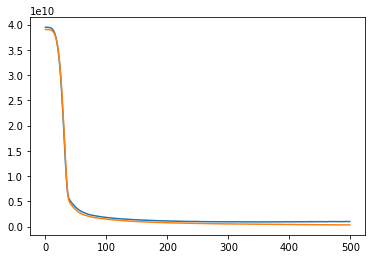

In [362]:
plt.plot(h['val_loss'],label="Validation loss")
plt.plot(h['loss'],label = 'Training_loss')
plt.show()

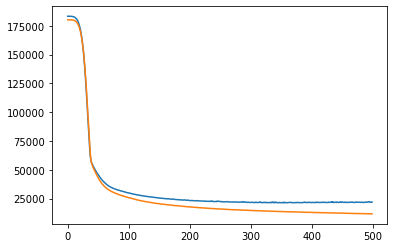

In [363]:
plt.plot(h['val_mae'],label="Validation mae")
plt.plot(h['mae'],label = 'Training_mae')
plt.show()

Making predictions on our training dataset

In [364]:
y = model.predict(x_train)
y

array([[240505.05 ],
       [183941.36 ],
       [113377.35 ],
       [239891.86 ],
       [169093.38 ],
       [147535.86 ],
       [117541.27 ],
       [165076.14 ],
       [294065.7  ],
       [341396.94 ],
       [ 77291.88 ],
       [151899.42 ],
       [264745.8  ],
       [110896.92 ],
       [237892.08 ],
       [187027.64 ],
       [154443.58 ],
       [237021.64 ],
       [106565.48 ],
       [132581.3  ],
       [207439.06 ],
       [230982.16 ],
       [116808.71 ],
       [315716.8  ],
       [113415.61 ],
       [138254.36 ],
       [283772.22 ],
       [117046.805],
       [217030.73 ],
       [180993.28 ],
       [ 88988.44 ],
       [ 91333.766],
       [116051.21 ],
       [186132.73 ],
       [ 74982.18 ],
       [206945.52 ],
       [116193.9  ],
       [115754.45 ],
       [ 83553.6  ],
       [112927.04 ],
       [527764.2  ],
       [113956.68 ],
       [162435.11 ],
       [214080.77 ],
       [203443.4  ],
       [140018.14 ],
       [206008.84 ],
       [22389

In [365]:
model.evaluate(x_train,y_train)

22/22 [==============================] - 0s 1ms/step - loss: 318635648.0000 - mae: 11585.8086 - acc: 0.0000e+00


[318635648.0, 11585.80859375, 0.0]

# Cleaning test dataset

In [24]:
test = pd.read_csv('Test_Data.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [25]:
test1 = test.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1)

In [26]:
#Creating different list of int and object type columns


columns = test1.columns
test_types = test1.dtypes
col_counts = test1.count()

N = test1.shape[0]

objt_cols = []
missing_objt_cols = []
missing_numt_cols = []

for i in range(test1.shape[1]):  
    if test_types[i]=='object' and col_counts[i]!=N:
        missing_objt_cols.append(columns[i])
        
for i in range(test1.shape[1]):        
    if test_types[i]=='object':
        objt_cols.append(columns[i])
        
print(objt_cols)
print(missing_objt_cols)

 
for j in range(test1.shape[1]):
    if (test_types[j]=='int64' or test_types[j]=='float64') and col_counts[j]!=N:
        missing_numt_cols.append(columns[j])
        
print(missing_numt_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


# Filling missing values and converting the data in numerical form

In [27]:
for i in missing_objt_cols:
    test1[i].fillna('NAN',inplace=True)
    
    

for j in missing_numt_cols:
    test1[j].fillna(test[j].mean(),inplace=True)

In [28]:
le = LabelEncoder()
cv = CountVectorizer()

    
for i in objt_cols:
    test1[i] = le.fit_transform(test1[i])




In [29]:
X_test = test1.values
print(X_test.shape)

(360, 76)


In [30]:
ss = StandardScaler()             #Normalising test data
x_test = ss.fit_transform(X_test)

# Making predictions on test dataset

In [347]:
predictions = model.predict(x_test)
predictions[:10]

array([[ 68776.54],
       [123866.04],
       [124903.41],
       [135192.95],
       [104665.08],
       [347320.78],
       [169529.11],
       [256358.69],
       [143279.16],
       [283887.47]], dtype=float32)

In [348]:
pred = predictions.reshape(x_test.shape[0])

Saving our predictions in a csv file

In [349]:
df = pd.DataFrame({'Id':test['Id'],
                   'SalesPrice':pred})     
df.to_csv('House_price_predictions',index = False)

Calculating r2_score

In [366]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y)
score

0.9515208048213826